In [17]:
import sys

sys.path.append('..')

In [28]:
import matplotlib.pyplot as plt

In [30]:
from fmpy import simulate_fmu

from config import FMU_ROOT

def simulate_default():
    filename = FMU_ROOT / '2.0/BouncingBall.fmu'
    
    result = simulate_fmu(
        filename=filename,
        stop_time=3,
        fmi_type='CoSimulation'
    )
    
    return result

def plot_default():
    result = simulate_default()

    time_data = []
    height_data = []
    velocity_data = []
    for row in result:
        time_data.append(row[0])
        height_data.append(row[1])
        velocity_data.append(row[2])

    plt.plot(time_list, height_list)
    plt.show()

    plt.plot(time_list, velocity_list)
    plt.show()

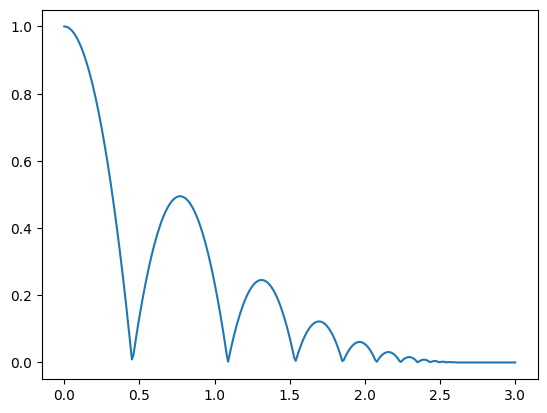

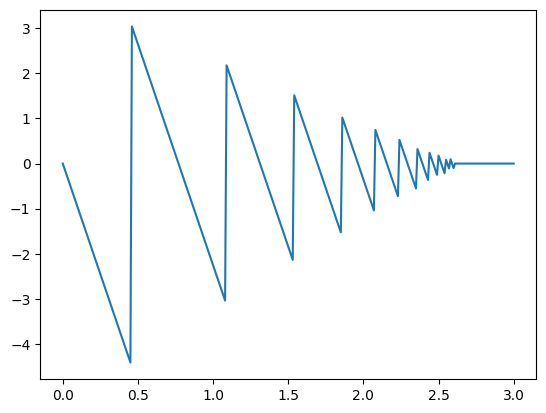

In [31]:
plot_default()

In [32]:
from datetime import timedelta

from bouncing_ball import BouncingBall
from simulator import simulator


def simulate_devs():
    m = BouncingBall()
    m.initialize()

    assert m.get_height() == 1
    assert m.get_velocity() == 0

    simulator.stop(timedelta(seconds=3))
    simulator.run()
    simulator.reset()

    m.cleanup()
    
    return m.height_log, m.velocity_log

In [33]:
heights, velocities = simulate_devs()

In [34]:
heights[0:10]

[(0.0, 1.0),
 (0.01, 0.9981361000000002),
 (0.02, 0.9957326500000004),
 (0.03, 0.9923482000000008),
 (0.04, 0.9879827500000012),
 (0.05, 0.9826363000000014),
 (0.06, 0.9763088500000009),
 (0.07, 0.9690004000000005),
 (0.08, 0.9607109500000003),
 (0.09, 0.9514405000000001)]

In [35]:
def plot_timeseries(ts):
    time_data = []
    value_data = []
    
    for t, v in ts:
        time_data.append(t)
        value_data.append(v)
    
    plt.plot(time_data, value_data)
    plt.show()

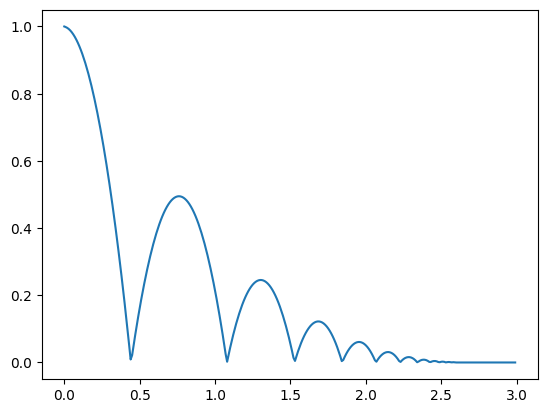

In [36]:
plot_timeseries(heights)

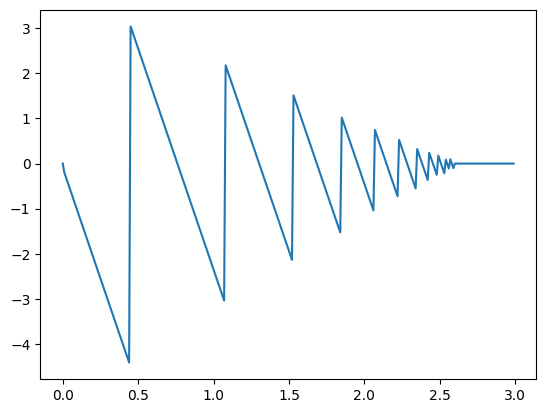

In [37]:
plot_timeseries(velocities)